In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import fit_library as fit_lib
import fit_library_n as fit_lib_n
import pandas as pd
%matplotlib nbagg
%reload_ext autoreload
%autoreload 2

In [108]:
# DATA
TH_HIGH = 1.414
TH_LOW = 0.404
Cint = 6.18E-12
GATE = 500E-9
pQ = 1E-12
#Ileak = 3.52E-6  # Computed from an empty input flip (dV*Cint/GATE)
Ileak = 3.5E-6 # Histogram fitted

Qu = (TH_HIGH-TH_LOW)*Cint / pQ

In [109]:
#pe_density = ["200pe"]
df = pd.DataFrame(columns=['pe_density','Q_true','Q_measured','Qu','N_flips','Q_residue'])



In [110]:
#pe_density = ["200pe","100pe","50pe","25pe"]
pe_density = ["1pe"]

for pe in pe_density:
        if (pe == "200pe"):
            n_pe = 4000
        if (pe == "100pe"):
            n_pe = 2000
        if (pe == "50pe"):
            n_pe = 1000
        if (pe == "25pe"):
            n_pe = 500
        #n_pe = 750
        if (pe == "1pe"):
            n_pe = 6
        
        for set_d in range(1,201):
            file = "_" + pe + "500ns_"+str(n_pe)+"pe"+ "_set" + str(set_d) + ".txt"

            Q_total = np.array(pd.read_csv("/home/viherbos/TEMP/results/few_pe/Qtotal"+ file ,header=None))
            residue=pd.read_csv("/home/viherbos/TEMP/results/few_pe/residue"+ file,header=None,skiprows=2,sep="    ")
            counter=pd.read_csv("/home/viherbos/TEMP/results/few_pe/counter"+ file,header=None,skiprows=2,sep="    ")
            residue = (residue.to_numpy()-TH_LOW)*Cint / pQ
            counter = counter.to_numpy()

            residue_t = np.sum(residue[:,1])
            entero = np.array(counter[:,1], dtype='int')
            binario = np.array(entero[:], dtype='str')
            flips = 0
            n_gates = len(binario)
            for i in range(n_gates):
                flips = flips + int(binario[i],2)
            q_meas = flips*Qu + residue_t - Ileak*GATE*n_gates/pQ

            aux_pd = pd.DataFrame(data={'pe_density':[pe], 'Q_true':[Q_total[0,0]/pQ], 'Q_measured':[q_meas],
                                                'Qu':[Qu], 'N_flips':[flips], 'Q_residue':[residue_t]})
            df = df.append(aux_pd, ignore_index=True)

/tmp/ipykernel_7402/2455792190.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/few_pe/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/2455792190.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/few_pe/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/2455792190.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_

/tmp/ipykernel_7402/2455792190.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/few_pe/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/2455792190.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/few_pe/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/2455792190.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_

/tmp/ipykernel_7402/2455792190.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/few_pe/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/2455792190.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_7402/2455792190.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/few_pe/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_

/tmp/ipykernel_7402/2455792190.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/few_pe/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/2455792190.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/few_pe/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/2455792190.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_

<IPython.core.display.Javascript object>


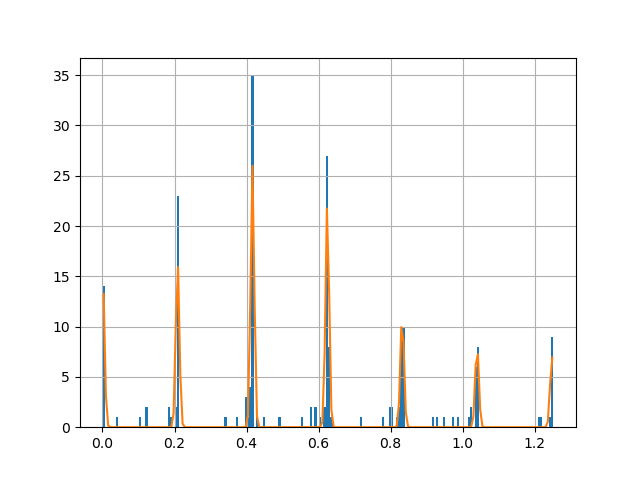

(200,)
(200,)
`ftol` termination condition is satisfied.
Function evaluations 19, initial cost 1.1931e+03, final cost 3.0402e+02, first-order optimality 4.99e+00.
pe Value in pC =  0.208
pe Value in mV =  33.65695792880259
pe Value in LSB(aprox) =  17.232362459546927


In [111]:
df['Q_measured'].hist(bins=200)
y,x = np.histogram(df['Q_measured'],bins=200)
x = (x[:-1] + x[1:])/2
print(np.shape(y))
print(np.shape(x))

fit = fit_lib_n.gaussn_least(x,y,7)
param =    [0, 0.208,  10 ,15 ,15 ,25 ,12 ,12, 10 ,0.01 ,0.01 ,0.01 ,0.01 ,0.01 ,0.01 ,0.01]
bounds = ([-1, 0.1,  0, 0, 0, 0, 0, 0, 0 ,0.005,0.005,0.005,0.005,0.005,0.005,0.005],
          [ 1, 0.4, 50,50,50,50,50,50,50 ,0.2 ,0.2 ,0.2 ,0.2 ,0.2 ,0.2 ,0.2 ])
out_param,perr = fit(bounds,*param)
#plt.figure()
#plt.plot(x,y)
plt.plot(x,fit.evaluate())
print("pe Value in pC = ",param[1])
print("pe Value in mV = ",param[1]*1E-12/(Cint)*1000)
print("pe Value in LSB(aprox) = ",param[1]*1E-12/(Cint)*1000/(1000/(2**9)))

In [123]:
pe_density = ["200pe","100pe","50pe","25pe"]
#pe_density = ["1pe"]

for pe in pe_density:
        if (pe == "200pe"):
            n_pe = 4000
        if (pe == "100pe"):
            n_pe = 2000
        if (pe == "50pe"):
            n_pe = 1000
        if (pe == "25pe"):
            n_pe = 500
        #n_pe = 750
        if (pe == "1pe"):
            n_pe = 6
        
        for set_d in range(1,101):
            file = "_" + pe + "500ns_"+str(n_pe)+"pe"+ "_set" + str(set_d) + ".txt"

            Q_total = np.array(pd.read_csv("/home/viherbos/TEMP/results/fixed_2/Qtotal"+ file ,header=None))
            residue=pd.read_csv("/home/viherbos/TEMP/results/fixed_2/residue"+ file,header=None,skiprows=2,sep="    ")
            counter=pd.read_csv("/home/viherbos/TEMP/results/fixed_2/counter"+ file,header=None,skiprows=2,sep="    ")
            residue = (residue.to_numpy()-TH_LOW)*Cint / pQ
            counter = counter.to_numpy()

            residue_t = np.sum(residue[:,1])
            entero = np.array(counter[:,1], dtype='int')
            binario = np.array(entero[:], dtype='str')
            flips = 0
            n_gates = len(binario)
            for i in range(n_gates):
                flips = flips + int(binario[i],2)
            q_meas = flips*Qu + residue_t - Ileak*GATE*n_gates/pQ

            aux_pd = pd.DataFrame(data={'pe_density':[pe], 'Q_true':[Q_total[0,0]/pQ], 'Q_measured':[q_meas],
                                                'Qu':[Qu], 'N_flips':[flips], 'Q_residue':[residue_t], 'n_gates':[n_gates]})
            df = df.append(aux_pd, ignore_index=True)

/tmp/ipykernel_7402/244501869.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/fixed_2/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/244501869.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/fixed_2/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/244501869.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_7

/tmp/ipykernel_7402/244501869.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_7402/244501869.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/fixed_2/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/244501869.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/fixed_2/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7

/tmp/ipykernel_7402/244501869.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/fixed_2/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/244501869.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/fixed_2/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/244501869.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_7

/tmp/ipykernel_7402/244501869.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_7402/244501869.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/fixed_2/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/244501869.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/fixed_2/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7

/tmp/ipykernel_7402/244501869.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/fixed_2/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/244501869.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_7402/244501869.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/fixed_2/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7

/tmp/ipykernel_7402/244501869.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_7402/244501869.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/fixed_2/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/244501869.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/fixed_2/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7

/tmp/ipykernel_7402/244501869.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_7402/244501869.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/fixed_2/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/244501869.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/fixed_2/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7

/tmp/ipykernel_7402/244501869.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_7402/244501869.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/fixed_2/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/244501869.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/fixed_2/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7

In [124]:
df_25pe=df[df['pe_density']=="25pe"]
df_50pe=df[df['pe_density']=="50pe"]
df_100pe=df[df['pe_density']=="100pe"]
df_200pe=df[df['pe_density']=="200pe"]
df_200pe.loc[:,'error']=df_200pe['Q_true']-df_200pe['Q_measured']
df_100pe.loc[:,'error']=df_100pe['Q_true']-df_100pe['Q_measured']
df_50pe.loc[:,'error']=df_50pe['Q_true']-df_50pe['Q_measured']
df_25pe.loc[:,'error']=df_25pe['Q_true']-df_25pe['Q_measured']

/tmp/ipykernel_7402/1724103550.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_200pe.loc[:,'error']=df_200pe['Q_true']-df_200pe['Q_measured']
/tmp/ipykernel_7402/1724103550.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100pe.loc[:,'error']=df_100pe['Q_true']-df_100pe['Q_measured']
/tmp/ipykernel_7402/1724103550.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

Resolution 25pe = 17.478%
Accuracy 25pe = -0.338 (-0.243%)
Number of flips (mean) =  20.173333333333332


Resolution 50pe = 14.103%
Accuracy 50pe = -0.354 (-0.204%)
Number of flips (mean) =  22.796666666666667


Resolution 100pe = 50.638%
Accuracy 100pe = 0.618 (0.256%)
Number of flips (mean) =  36.06


Resolution 200pe = 83.471%
Accuracy 200pe = 3.516 (0.931%)
Number of flips (mean) =  58.153333333333336


<IPython.core.display.Javascript object>


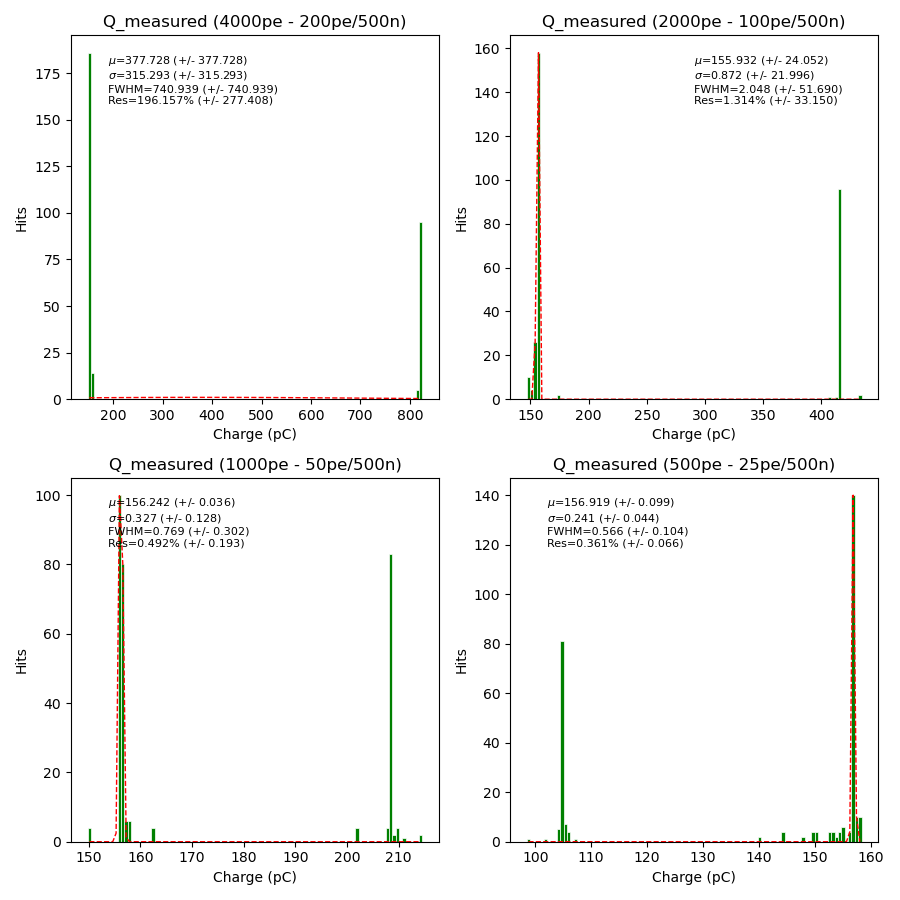

Fitting Problems


<IPython.core.display.Javascript object>


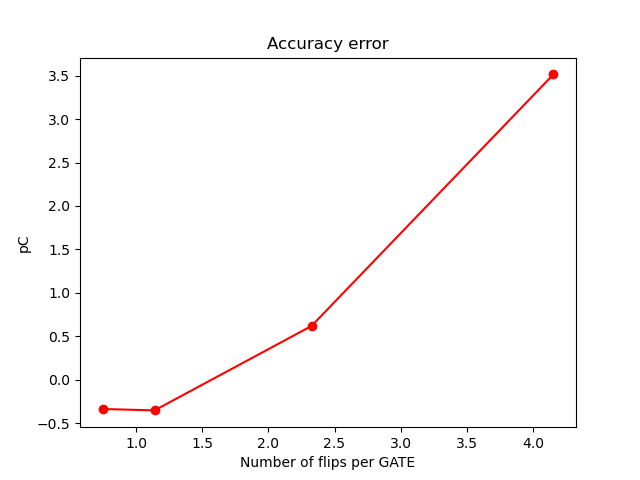

Text(0.5, 1.0, 'Accuracy error')

In [126]:
res_25 = np.std(df_25pe['Q_measured'])/np.mean(df_25pe['Q_measured'])*100
res_50 = np.std(df_50pe['Q_measured'])/np.mean(df_50pe['Q_measured'])*100
res_100 = np.std(df_100pe['Q_measured'])/np.mean(df_100pe['Q_measured'])*100
res_200 = np.std(df_200pe['Q_measured'])/np.mean(df_200pe['Q_measured'])*100

acc_abs_25 = np.mean(df_25pe['error'])
acc_rel_25 = np.mean(df_25pe['error']/np.mean(df_25pe['Q_measured'])*100)
acc_abs_50 = np.mean(df_50pe['error'])
acc_rel_50 = np.mean(df_50pe['error']/np.mean(df_50pe['Q_measured'])*100)
acc_abs_100 = np.mean(df_100pe['error'])
acc_rel_100 = np.mean(df_100pe['error']/np.mean(df_100pe['Q_measured'])*100)
acc_abs_200 = np.mean(df_200pe['error'])
acc_rel_200 = np.mean(df_200pe['error']/np.mean(df_200pe['Q_measured'])*100)
nflips_25 = np.mean(df_25pe['N_flips'])
nflips_50 = np.mean(df_50pe['N_flips'])
nflips_100 = np.mean(df_100pe['N_flips'])
nflips_200 = np.mean(df_200pe['N_flips'])
ngates_25 = np.mean(df_25pe['n_gates'])
ngates_50 = np.mean(df_50pe['n_gates'])
ngates_100 = np.mean(df_100pe['n_gates'])
ngates_200 = np.mean(df_200pe['n_gates'])

print("Resolution 25pe = %1.3f%%" % (res_25))
print("Accuracy 25pe = %1.3f (%1.3f%%)" % (acc_abs_25,acc_rel_25))
print("Number of flips (mean) = ", nflips_25)
print("\n")
print("Resolution 50pe = %1.3f%%" % (res_50))
print("Accuracy 50pe = %1.3f (%1.3f%%)" % (acc_abs_50,acc_rel_50))
print("Number of flips (mean) = ", nflips_50)
print("\n")
print("Resolution 100pe = %1.3f%%" % (res_100))
print("Accuracy 100pe = %1.3f (%1.3f%%)" % (acc_abs_100,acc_rel_100))
print("Number of flips (mean) = ", nflips_100)
print("\n")
print("Resolution 200pe = %1.3f%%" % (res_200))
print("Accuracy 200pe = %1.3f (%1.3f%%)" % (acc_abs_200,acc_rel_200))
print("Number of flips (mean) = ", nflips_200)

fit_pe = fit_lib.gauss_fit()
fig = plt.figure(figsize=(9,9))

fit_pe(df_200pe['Q_measured'],100)
fit_pe.plot(axis = fig.add_subplot(221),
            title = 'Q_measured (4000pe - 200pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.1,0.95,"left"])
fit_pe(df_100pe['Q_measured'],100)
fit_pe.plot(axis = fig.add_subplot(222),
            title = 'Q_measured (2000pe - 100pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.5,0.95,"left"])
fit_pe(df_50pe['Q_measured'],100)
fit_pe.plot(axis = fig.add_subplot(223),
            title = 'Q_measured (1000pe - 50pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.1,0.95,"left"])
fit_pe(df_25pe['Q_measured'],100)
fit_pe.plot(axis = fig.add_subplot(224),
            title = 'Q_measured (500pe - 25pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.1,0.95,"left"])

fig.tight_layout()

acc_abs = [acc_abs_25, acc_abs_50, acc_abs_100, acc_abs_200]
nflips_gate = [nflips_25/ngates_25,nflips_50/ngates_50,nflips_100/ngates_100,nflips_200/ngates_200]
plt.figure()
plt.plot(nflips_gate,acc_abs,'ro-')
plt.xlabel("Number of flips per GATE")
plt.ylabel("pC")
plt.title("Accuracy error")

In [76]:
df_25pe.reset_index(inplace=True)
df_50pe.reset_index(inplace=True)
df_100pe.reset_index(inplace=True)
df_200pe.reset_index(inplace=True)



In [77]:
df_25pe.loc[df_25pe['error'].idxmax()]

index               658
pe_density         25pe
Q_true          103.989
Q_measured    98.464142
Qu               6.2418
N_flips              17
Q_residue     32.603542
error          5.524858
Name: 58, dtype: object

In [78]:
df_25pe.loc[24]

index                624
pe_density          25pe
Q_true           103.997
Q_measured    104.598447
Qu                6.2418
N_flips               16
Q_residue      44.979647
error          -0.601447
Name: 24, dtype: object

df_25pe

In [79]:
df_25pe

,index,pe_density,Q_true,Q_measured,Qu,N_flips,Q_residue,error
0,600,25pe,104.002,104.640298,6.2418,15,51.263298,-0.638298
1,601,25pe,103.997,104.664845,6.2418,16,45.046045,-0.667845
2,602,25pe,103.999,104.560088,6.2418,15,51.183088,-0.561088
3,603,25pe,103.995,104.565551,6.2418,15,51.188551,-0.570551
4,604,25pe,104.001,104.443007,6.2418,13,63.549607,-0.442007
...,...,...,...,...,...,...,...,...
95,695,25pe,104.000,104.692420,6.2418,15,51.315420,-0.692420
96,696,25pe,104.003,104.600029,6.2418,15,51.223029,-0.597029
97,697,25pe,103.995,105.098260,6.2418,14,57.963060,-1.103260
98,698,25pe,103.999,104.781974,6.2418,17,38.921374,-0.782974


In [117]:
pe_density = ["200pe","100pe","50pe","25pe"]
#pe_density = ["1pe"]

for pe in pe_density:
        n_pe = 750
       
        for set_d in range(1,101):
            file = "_" + pe + "500ns_"+str(n_pe)+"pe"+ "_set" + str(set_d) + ".txt"

            Q_total = np.array(pd.read_csv("/home/viherbos/TEMP/results/variable_1/Qtotal"+ file ,header=None))
            residue=pd.read_csv("/home/viherbos/TEMP/results/variable_1/residue"+ file,header=None,skiprows=2,sep="    ")
            counter=pd.read_csv("/home/viherbos/TEMP/results/variable_1/counter"+ file,header=None,skiprows=2,sep="    ")
            residue = (residue.to_numpy()-TH_LOW)*Cint / pQ
            counter = counter.to_numpy()

            residue_t = np.sum(residue[:,1])
            entero = np.array(counter[:,1], dtype='int')
            binario = np.array(entero[:], dtype='str')
            flips = 0
            n_gates = len(binario)
            for i in range(n_gates):
                flips = flips + int(binario[i],2)
            q_meas = flips*Qu + residue_t - Ileak*GATE*n_gates/pQ

            aux_pd = pd.DataFrame(data={'pe_density':[pe], 'Q_true':[Q_total[0,0]/pQ], 'Q_measured':[q_meas],
                                                'Qu':[Qu], 'N_flips':[flips], 'Q_residue':[residue_t], 'n_gates':[n_gates]})
            df = df.append(aux_pd, ignore_index=True)

/tmp/ipykernel_7402/3410204379.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/variable_1/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/3410204379.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/variable_1/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/3410204379.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ip

/tmp/ipykernel_7402/3410204379.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_7402/3410204379.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/variable_1/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/3410204379.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/variable_1/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ip

/tmp/ipykernel_7402/3410204379.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/variable_1/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/3410204379.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/variable_1/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/3410204379.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ip

/tmp/ipykernel_7402/3410204379.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/variable_1/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/3410204379.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/variable_1/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/3410204379.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ip

/tmp/ipykernel_7402/3410204379.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/variable_1/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/3410204379.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/variable_1/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/3410204379.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ip

/tmp/ipykernel_7402/3410204379.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/variable_1/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/3410204379.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/variable_1/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/3410204379.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ip

/tmp/ipykernel_7402/3410204379.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_7402/3410204379.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/variable_1/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/3410204379.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/variable_1/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ip

/tmp/ipykernel_7402/3410204379.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/variable_1/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/3410204379.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_7402/3410204379.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/variable_1/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ip

In [118]:
df_25pe=df[df['pe_density']=="25pe"]
df_50pe=df[df['pe_density']=="50pe"]
df_100pe=df[df['pe_density']=="100pe"]
df_200pe=df[df['pe_density']=="200pe"]
df_200pe.loc[:,'error']=df_200pe['Q_true']-df_200pe['Q_measured']
df_100pe.loc[:,'error']=df_100pe['Q_true']-df_100pe['Q_measured']
df_50pe.loc[:,'error']=df_50pe['Q_true']-df_50pe['Q_measured']
df_25pe.loc[:,'error']=df_25pe['Q_true']-df_25pe['Q_measured']

/tmp/ipykernel_7402/1724103550.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_200pe.loc[:,'error']=df_200pe['Q_true']-df_200pe['Q_measured']
/tmp/ipykernel_7402/1724103550.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100pe.loc[:,'error']=df_100pe['Q_true']-df_100pe['Q_measured']
/tmp/ipykernel_7402/1724103550.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

Resolution 25pe = 1.888%
Accuracy 25pe = -0.180 (-0.116%)
Number of flips (mean) =  22.75


Resolution 50pe = 0.841%
Accuracy 50pe = -0.396 (-0.253%)
Number of flips (mean) =  20.59


Resolution 100pe = 1.681%
Accuracy 100pe = 0.600 (0.386%)
Number of flips (mean) =  23.29


Resolution 200pe = 0.485%
Accuracy 200pe = 1.186 (0.766%)
Number of flips (mean) =  23.7


<IPython.core.display.Javascript object>


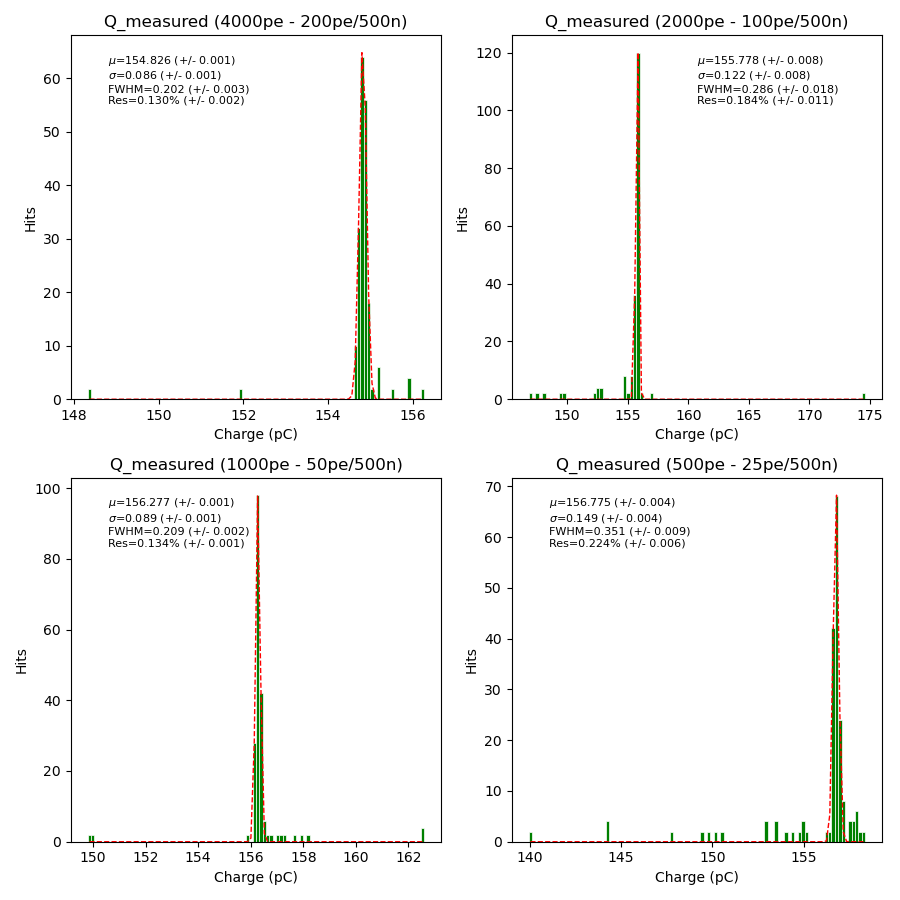

<IPython.core.display.Javascript object>


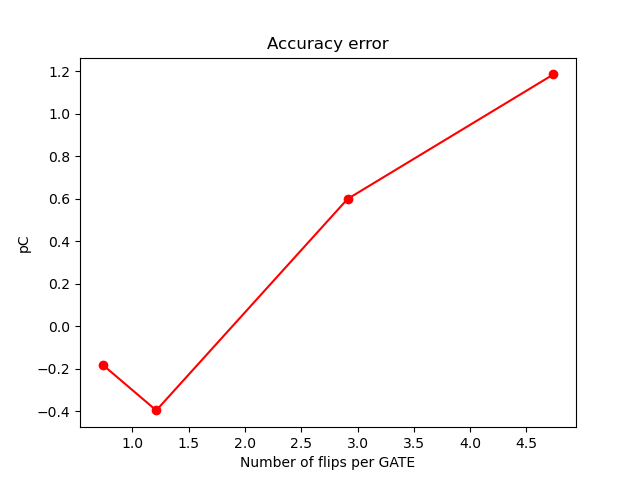

Text(0.5, 1.0, 'Accuracy error')

In [122]:
res_25 = np.std(df_25pe['Q_measured'])/np.mean(df_25pe['Q_measured'])*100
res_50 = np.std(df_50pe['Q_measured'])/np.mean(df_50pe['Q_measured'])*100
res_100 = np.std(df_100pe['Q_measured'])/np.mean(df_100pe['Q_measured'])*100
res_200 = np.std(df_200pe['Q_measured'])/np.mean(df_200pe['Q_measured'])*100

acc_abs_25 = np.mean(df_25pe['error'])
acc_rel_25 = np.mean(df_25pe['error']/np.mean(df_25pe['Q_measured'])*100)
acc_abs_50 = np.mean(df_50pe['error'])
acc_rel_50 = np.mean(df_50pe['error']/np.mean(df_50pe['Q_measured'])*100)
acc_abs_100 = np.mean(df_100pe['error'])
acc_rel_100 = np.mean(df_100pe['error']/np.mean(df_100pe['Q_measured'])*100)
acc_abs_200 = np.mean(df_200pe['error'])
acc_rel_200 = np.mean(df_200pe['error']/np.mean(df_200pe['Q_measured'])*100)
nflips_25 = np.mean(df_25pe['N_flips'])
nflips_50 = np.mean(df_50pe['N_flips'])
nflips_100 = np.mean(df_100pe['N_flips'])
nflips_200 = np.mean(df_200pe['N_flips'])
ngates_25 = np.mean(df_25pe['n_gates'])
ngates_50 = np.mean(df_50pe['n_gates'])
ngates_100 = np.mean(df_100pe['n_gates'])
ngates_200 = np.mean(df_200pe['n_gates'])


print("Resolution 25pe = %1.3f%%" % (res_25))
print("Accuracy 25pe = %1.3f (%1.3f%%)" % (acc_abs_25,acc_rel_25))
print("Number of flips (mean) = ", nflips_25)
print("\n")
print("Resolution 50pe = %1.3f%%" % (res_50))
print("Accuracy 50pe = %1.3f (%1.3f%%)" % (acc_abs_50,acc_rel_50))
print("Number of flips (mean) = ", nflips_50)
print("\n")
print("Resolution 100pe = %1.3f%%" % (res_100))
print("Accuracy 100pe = %1.3f (%1.3f%%)" % (acc_abs_100,acc_rel_100))
print("Number of flips (mean) = ", nflips_100)
print("\n")
print("Resolution 200pe = %1.3f%%" % (res_200))
print("Accuracy 200pe = %1.3f (%1.3f%%)" % (acc_abs_200,acc_rel_200))
print("Number of flips (mean) = ", nflips_200)

fit_pe = fit_lib.gauss_fit()
fig = plt.figure(figsize=(9,9))

fit_pe(df_200pe['Q_measured'],100)
fit_pe.plot(axis = fig.add_subplot(221),
            title = 'Q_measured (4000pe - 200pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.1,0.95,"left"])
fit_pe(df_100pe['Q_measured'],100)
fit_pe.plot(axis = fig.add_subplot(222),
            title = 'Q_measured (2000pe - 100pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.5,0.95,"left"])
fit_pe(df_50pe['Q_measured'],100)
fit_pe.plot(axis = fig.add_subplot(223),
            title = 'Q_measured (1000pe - 50pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.1,0.95,"left"])
fit_pe(df_25pe['Q_measured'],100)
fit_pe.plot(axis = fig.add_subplot(224),
            title = 'Q_measured (500pe - 25pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.1,0.95,"left"])

fig.tight_layout()

acc_abs = [acc_abs_25, acc_abs_50, acc_abs_100, acc_abs_200]
nflips_gate = [nflips_25/ngates_25,nflips_50/ngates_50,nflips_100/ngates_100,nflips_200/ngates_200]
plt.figure()
plt.plot(nflips_gate,acc_abs,'ro-')
plt.xlabel("Number of flips per GATE")
plt.ylabel("pC")
plt.title("Accuracy error")
